# Lendo, Visualizando e Manipulando Imagens

## Objetivo

O objetivo deste notebook é demonstrar como carregar, visualizar e manipular imagens para deixá-las prontas 
para o uso pelas redes convolucionais.

Exemplificaremos as operações usando as duas bibliotecas mas comuns:

* Matplotlib
* PIL

## Carregando as imagens do repositório

In [1]:
# download image from github: -q quiet mode; -N overwrite on the next download
!wget -q -N https://github.com/robertoalotufo/rnap/raw/master/figures/Iris_versicolor.jpg
!wget -q -N https://github.com/robertoalotufo/rnap/raw/master/figures/iris_petals_sepals.png


## A biblioteca PIL

A biblioteca PIL, ou Python Image Processing traz para o Python a capacidade de processar imagens. A biblioteca suporta vários formatos de arquivo e poderosas ferramentas de processamento de imagem.

Alguns dos usos da biblioteca são Arquivamento, fazendo processamento em lote de imagens, Exibição, suportando várias interfaces (GUIs) e Processamento, como redimensionamento, rotação, histograma, dentre outras.

### Importando a biblioteca PIL

In [2]:
import numpy as np
from IPython.display import display
from PIL import Image

### Carregando uma imagem do disco

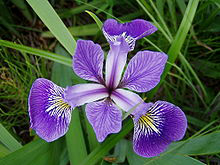

In [3]:
img = Image.open('Iris_versicolor.jpg')
img

### Estrutura de dados

O formato PIL utiliza uma classe própria e não é apropriada para o processamento
matricial. Assim, para se fazer processamento, recomenda-se converter a image para NumPy array ou PyTorch tensor.

In [4]:
type(img)
img.size, img.bits, img.format, img.mode

((220, 165), 8, 'JPEG', 'RGB')

### Mostrando uma imagem PIL

No jupyter-notebook, chamar o objeto que contém a imagem faz com que ela seja mostrada.

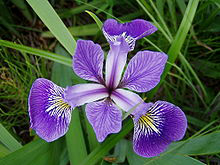

In [5]:
img

Ou também é possível usar o método `display` da classe `IPython.display`.

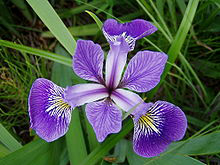

In [6]:
display(img)

Para salvar uma imagem em disco, usamos o método `save` passando como parâmetro o caminho para salvar a imagem. Caso seja necessário alterar o formato da imagem, é possível passar como parâmetro o formato desejado.

### Salvando uma imagem PIL

In [7]:
img.save('Iris_versicolor_copy.png','png')

## NumPy

### Transformando uma imagem em um array numpy

Para se processar imagem, é recomendado o uso do NumPy.
Para transformar a imagem em um array numpy, usamos o método `array` da classe numpy.

In [8]:
np_img = np.array(img)

### Mostrando as dimensões da imagem

Neste caso, a imagem possui 3 dimensões: a primeira é altura da imagem, a segundo é a largura da imagem e a terceira contém os canais R, G, B da imagem.

Existem duas formas principais de representar a imagem no array:
- channels first: (channel, Height, Width)
- channels last:  (Height, Width, channel)

Neste caso, a imagem está representada no formato *channels last*

In [9]:
np_img.shape

(165, 220, 3)

Tensorflow, Theano e PyTorch podem diferir quanto a posição dos canais. Para isso podemos trocar as dimensões e passar a informação de canais para a primeira posição. Esta configuração é conhecida como channels-first.

In [10]:
np_img_cfirst = np_img.transpose(2, 0, 1)
np_img_cfirst.shape

(3, 165, 220)

In [11]:
np_img.shape, np_img.dtype, np_img.min(), np_img.max()

((165, 220, 3), dtype('uint8'), 0, 255)

### Convertendo do NumPy para PIL

É fácil converter uma imagem NumPy para PIL usando o método `fromarray`. 
É importante observar que o formato precisa estar no *channel last* antes da conversão.

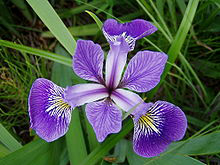

In [12]:
Image.fromarray(np_img)

In [13]:
np_img_gs = np_img.mean(axis=2).astype(np.uint8)
np_img_gs.dtype, np_img_gs.shape

(dtype('uint8'), (165, 220))

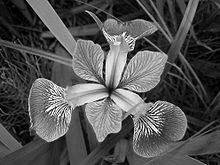

In [14]:
Image.fromarray(np_img_gs)

## A biblioteca Matplotlib

O Matplotlib é uma biblioteca para plotagem 2D. Com ela é possível plotar pontos, funções, estatísticas e imagens. É possível também ler e escrever imagens no disco.

### Importando a biblioteca

`Nota:` quando o Matplotlib é usando dentro do Jupyter-Notebook é necessário o uso do comando `%matplotlib inline` para que os gráficos sejam mostrados.

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

### Mostrando uma imagem no Matplotlib

Note que para mostrar uma imagem com a biblioteca Matplotlib, esta já precisa estar carregada em um objeto.

A biblioteca Matplotlib consegue mostrar tanto imagens coloridas no formato PIL quanto arrays NumPy no formato *channels last*.

### Mostrando uma imagem no formato array numpy:

(165, 220, 3)


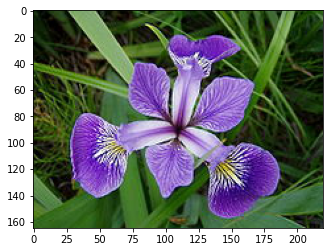

In [16]:
print(np_img.shape)
plt.imshow(np_img);

### Mostrando uma imagem no formato PIL:

165 220


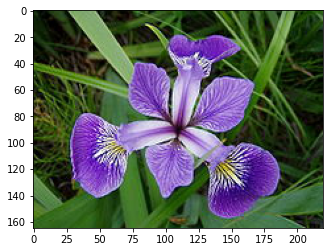

In [17]:
print(img.height, img.width)
plt.imshow(img)

### Manipulando o plot

Por ser uma biblioteca de plotagem, é possível manipular várias informações do plot, como grid, título, label dos eixos, tamanho da figura, dentre outras.

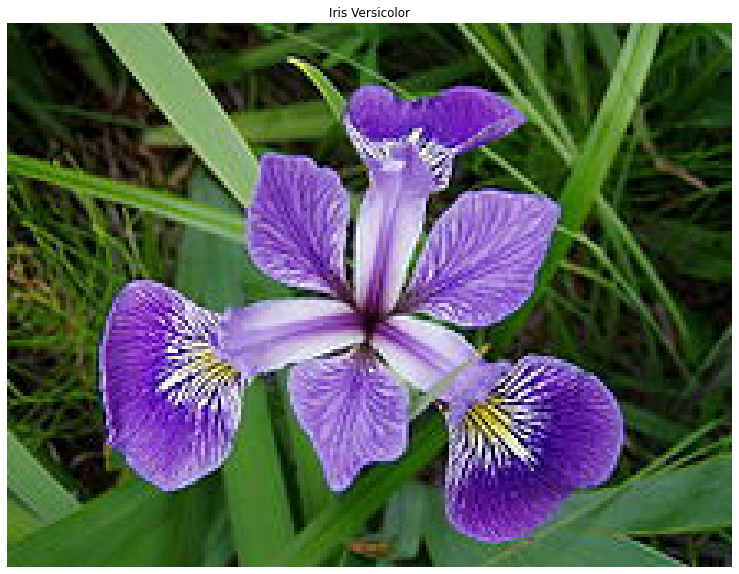

In [18]:
plt.figure(figsize=(15, 10))
plt.title("Iris Versicolor")
plt.imshow(np_img)
plt.axis('off')
plt.show()

### Mostrando imagens monocromáticas ou grayscale (duas dimensões) no Matplotlib

In [19]:
np_img_gs.shape

(165, 220)

Por padrão, o Matplotlib utiliza uma tabela de cor falsa (pseudo cor) quando visualiza uma imagem de um único canal. A função colorbar() mostra a tabela de cor utilizada:

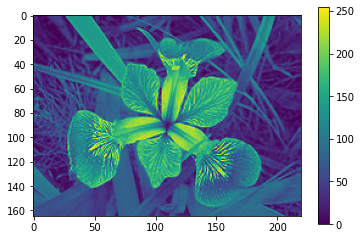

In [20]:
plt.imshow(np_img_gs)
plt.colorbar();

Para visualizar a imagem en tons de cinza, deve-se informar a tabela `gray`, no parâmetro `cmap` do `imshow`. 

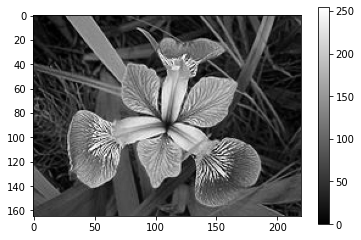

In [21]:
plt.imshow(np_img_gs, cmap='gray')
plt.colorbar()

### Leitura de imagens com Matplotlib

Existe um **cuidado especial** quando utilizar o Matplotlib para ler imagens.
Dependendo do formato do arquivo da imagem, o arrary NumPy lido pode ser 
normalizado.

Veja o exemplo a seguir. Enquanto que a leitura via PIL preserva o tipo dos
pixels como 8 bits sem sinal (`uint8`), com valores de 0 a 255, o Matplotlib
converte para o tipo ponto flutuante 32 bits (`float32`) e normaliza entre 0 e 1: 

In [22]:
import matplotlib.image as mpimg

No exemplo a seguir, a imagem PNG possui 4 canais: (R,G,B,A) onde o último é chamado canal Alfa. Vamos primeiro ler e visualizar como PIL, depois iremos ler com Matplotlib e converter PIL para NumPy e visualizar ambas com o Matplotlib. Veja as diferenças.

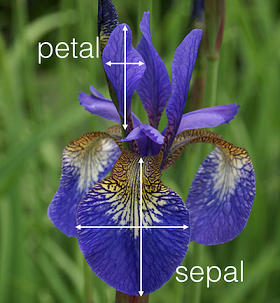

In [23]:
img_PIL = Image.open('iris_petals_sepals.png')
img_PIL

In [24]:
img = mpimg.imread('iris_petals_sepals.png')
img.shape, img.dtype, img.min(), img.max()

((303, 280, 4), dtype('float32'), 0.0, 1.0)

In [25]:
img_PIL_np = np.array(img_PIL)
img_PIL_np.shape, img_PIL_np.dtype, img_PIL_np.min(), img_PIL_np.max()

((303, 280, 4), dtype('uint8'), 0, 255)

Entretanto, o matplotlib consegue fazer o display dos dois tipos de imagens: `uint8` e `float`, sendo que nesse último formato, os dados devem estar normalizados entre 0 e 1.

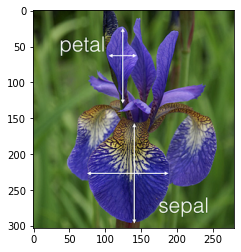

In [26]:
plt.imshow(img);

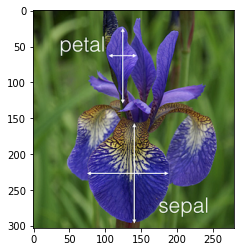

In [27]:
plt.imshow(img_PIL_np);

No trecho a seguir, é colocado um círculo binário no canal Alfa: um na parte central e zero na parte externa.

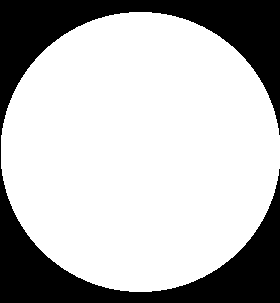

In [28]:
H,W = img.shape[:2]
r,c = np.indices((H,W))
circle = (r - H/2)**2 + (c - W/2)**2 < (min(H,W)/2)**2
# display the binary image circle
Image.fromarray(circle)

In [29]:
# copy the binary image into the 3 channels of the image
# here is used the broadcast numpy operation
img[:,:,3]= circle

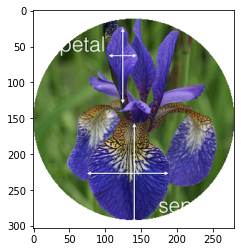

In [30]:
plt.imshow(img)

In [31]:
# try to diplay this image converting it to PIL

## PyTorch

O PyTorch possui o pacote `torchvision` que possui diversas funções especiais para 
processamento de imagens, apropriadas para a preparação dos dados para treinamento
de redes profundas.

In [32]:
import torch
import torchvision as tv

### Convertendo para tensor e de volta para imagem PIL

As funções de conversão para tensores e de volta para imagens PIL são implementadas
pelas classes `ToTensor` e `ToPILImage`, respectivamente.
A transformação para tensor, **automaticamente normaliza a imagem entre 0 e 1**.
Note entretanto que essas classes precisam ser inicializadas criando as funções
instanciadas, como no código a seguir.

Lembrar que as funções instanciadas são funções. Para facilitar a memorização, coloquei `f_` como prefixo para lembrar que é uma função:

In [33]:
f_img2tensor = tv.transforms.ToTensor() # instance to convert img to tensor
f_tensor2PIL = tv.transforms.ToPILImage() # instance to convert tensor to PIL

A seguir é feita a leitura de uma imagem jpeg colorida, convertida para NumPy array e
em seguida convertida para tensor.

In [34]:
img = np.array(Image.open('Iris_versicolor.jpg'))
print('f.shape:',img.shape)
img_tensor = f_img2tensor(img)
print('img_tensor.shape:',img_tensor.shape)

f.shape: (165, 220, 3)
img_tensor.shape: torch.Size([3, 165, 220])


Observe que a imagem NumPy é `uint8` enquanto que a imagem tensor é `float` normalizada entre 0 e 1:

In [35]:
print('img:',img.min(),img.max(), img.mean())
print('img_tensor:', img_tensor.min(), img_tensor.max(), img_tensor.mean())

img: 0 255 82.57667584940312
img_tensor: tensor(0.) tensor(1.) tensor(0.3238)


## Visualização de imagens de tensores 
A visualização de um tensor pode ser facilmente feita pela função instanciada que converte
tensor para PIL:

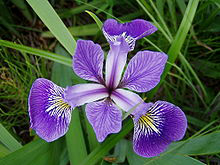

In [36]:
f_tensor2PIL(img_tensor)

Uma forma bastante versátil de imprimir um array the imagens, muito usado no PyTorch é com a função `make_grid`:

In [37]:
mosaic = tv.utils.make_grid([img_tensor, 1-img_tensor, img_tensor/2],padding=20)

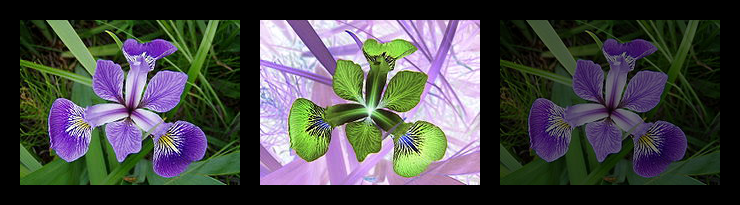

In [38]:
f_tensor2PIL(mosaic)

### Usando a transformação Normalize do PyTorch

A transformação `Normalize` subtrai o valor `mean` e divide pelo valor `std`. 
Se você utilizar para estes valores a média e o desvio padrão da imagem, a imagem
resultará normalizada para média zero e desvio padrão 1.

Todas as redes utilizadas na competição ImageNet normalizam as imagens subtraindo do valor [0.485, 0.456, 0.406] dos canais RGB e dividindo pelo valor [0.229, 0.224, 0.225]. Essas
imagens normalizadas não são apropriadas para visualização, pois perdeu-se a normalização
entre 0. e 1. necessária para visualização de imagens coloridas.

Para visualizar essas imagens, é necessário trazê-las de volta para os mesmos valores.
Isso pode ser feito, primeiro multiplicando-se os canais por [0.229, 0.224, 0.225] e
depois somar [0.485, 0.456, 0.406].

Os exemplos a seguir ilustram essas questões.

Primeiro, calculando a média e o desvio padrão de cada canal RGB para ser
utilizado na normalização média 0 e desvio 1:

In [39]:
# observe que o tensor está no formato channel first
img_tensor.shape

torch.Size([3, 165, 220])

In [40]:
# aqui a média e desvio são calculados em cada canal
# é uma operação de redução de eixos
img_m = img_tensor.mean(dim=(1,2))
img_s = img_tensor.std(dim=(1,2))
print(img_m, img_s)

tensor([0.3116, 0.3403, 0.3195]) tensor([0.2278, 0.2033, 0.3161])


#### Instanciando as normalizações: tanto para média 0 e desvio 1 como para ImageNet

Observe the a instância da classe Normalize resulta numa função que vai subtrair a média e o desvio padrão inicializados.

- f_norm01 serve para normalizar N(0,1) imagens de média img_m e desvio img_s

- f_normimgnet serve para normalizar próximas de N(0,1) imagens da ImageNet

In [41]:
f_norm01     = tv.transforms.Normalize(mean=img_m, std=img_s)
f_normimgnet = tv.transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                       std =[0.229, 0.224, 0.225])
f_norm01, f_normimgnet

(Normalize(mean=tensor([0.3116, 0.3403, 0.3195]), std=tensor([0.2278, 0.2033, 0.3161])),
 Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]))

In [42]:
img_norm01 = f_norm01(img_tensor.clone())
print(img_norm01.mean(dim=(1,2)))
print(img_norm01.std(dim=(1,2)))

tensor([-8.9903e-08,  1.6357e-07,  5.6485e-08])
tensor([1., 1., 1.])


In [43]:
# normalizando a imagem em relação à ImageNet
# nesse caso a imagem não terá distribuição N(0,1)
img_normimgnet = f_normimgnet(img_tensor.clone())
print(img_normimgnet.mean(dim=(1,2)))
print(img_normimgnet.std(dim=(1,2)))

tensor([-0.7570, -0.5163, -0.3844])
tensor([0.9949, 0.9078, 1.4047])


#### Recuperando os valores originais

In [44]:
img_orig = img_norm01 * img_s.unsqueeze(1).unsqueeze(1) + img_m.unsqueeze(1).unsqueeze(1)
print(img_orig.mean(dim=(1,2)))
print(img_orig.std((1,2)))

tensor([0.3116, 0.3403, 0.3195])
tensor([0.2278, 0.2033, 0.3161])


In [45]:
img_orig = img_normimgnet * \
         torch.FloatTensor([0.229, 0.224, 0.225]).unsqueeze(1).unsqueeze(1) + \
         torch.FloatTensor([0.485, 0.456, 0.406]).unsqueeze(1).unsqueeze(1)
print(img_orig.mean(1).mean(1))
print(img_orig.std(1).std(1))

tensor([0.3116, 0.3403, 0.3195])
tensor([0.0615, 0.0333, 0.1034])
